## Support Vector Machines

### Table of Contents <a name="toc"></a>


- [Packages and Notebook Properties](#notebook)
- [Theory Discussion](#theory)
- [Dataset Exploration](#dataset)
    - [Background](#databackground)
    - [Exploratory Data Analysis](#eda)
- [Implementation](#implementation)

### Packages and Notebook Properties <a name="notebook"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys
import os

Set notebook properties

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
sns.set_style("darkgrid")

Set data path

In [3]:
DATA_PATH = r'../data_source'

### Theory Discussion <a name="theory"></a>

### Dataset Exploration <a name="dataset"></a>

#### Background <a name="databackground"></a>

In this exercise, we will take a look at vaccination, a key public health measure used to fight infectious diseases. Vaccines provide immunization for individuals, and enough immunization in a community can further reduce the spread of diseases through "herd immunity".

A phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, we will be predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine. Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

The dataset is taken from the competetion page in [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/).

#### Exploratory Data Analysis <a name="eda"></a>

[back to top](#toc)

In [4]:
training_set_features = pd.read_csv(os.path.join(DATA_PATH, 'training_set_features.csv'))
training_set_labels = pd.read_csv(os.path.join(DATA_PATH, 'training_set_labels.csv'))
test_set_features = pd.read_csv(os.path.join(DATA_PATH, 'test_set_features.csv'))

In [5]:
training_set_features.sample(4)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
4466,4466,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,2.0,4.0,2.0,2.0,4.0,35 - 44 Years,NaN,Hispanic,Male,NaN,NaN,NaN,NaN,oxchjgsf,"MSA, Not Principle City",1.0,3.0,NaN,NaN
26359,26359,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,4.0,1.0,1.0,1.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,1.0,fcxhlnwr,cmhcxjea
25087,25087,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,4.0,5.0,2.0,1.0,65+ Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,wxleyezf,xtkaffoo
2992,2992,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,1.0,3.0,4.0,2.0,4.0,4.0,1.0,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Principle City",0.0,0.0,arjwrbjb,xtkaffoo


In [6]:
training_set_labels.sample(4)

,respondent_id,h1n1_vaccine,seasonal_vaccine
8376,8376,1,0
809,809,1,1
24622,24622,1,1
11311,11311,1,1


Merge the training set features with labels

In [7]:
train_df = training_set_features.merge(training_set_labels, on=['respondent_id'], how='left')

In [8]:
# used for counting categories; trick
train_df['count'] = 1

In [9]:
train_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,count
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0,1


Inspect the overlap between `h1n1_vaccine` and `seasonal_vaccine`

In [10]:
h1n1_vaccine_count = train_df.groupby('h1n1_vaccine', as_index=False)['respondent_id'].count()
h1n1_vaccine_count.rename(columns={'h1n1_vaccine': 'category',
                                   'respondent_id': 'h1n1'},
                          inplace=True)

In [11]:
seasonal_vaccine_count = train_df.groupby('seasonal_vaccine', as_index=False)['respondent_id'].count()
seasonal_vaccine_count.rename(columns={'seasonal_vaccine': 'category',
                                       'respondent_id': 'seasonal'},
                              inplace=True)

In [12]:
vaccinated_table = h1n1_vaccine_count.merge(seasonal_vaccine_count, on='category', how='left')
vaccinated_table['category'] = ['vaccinated' if x else 'non-vaccinated' for x in vaccinated_table['category']]
vaccinated_table['h1n1'] = vaccinated_table['h1n1']/vaccinated_table['h1n1'].sum()
vaccinated_table['seasonal'] = vaccinated_table['seasonal']/vaccinated_table['seasonal'].sum()

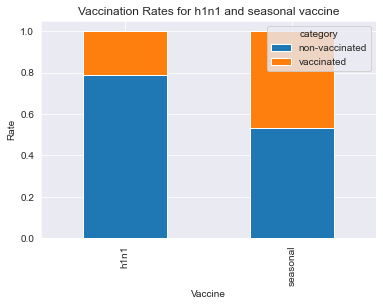

In [13]:
vaccinated_table.set_index('category').T.plot(kind='bar', stacked=True)
plt.title('Vaccination Rates for h1n1 and seasonal vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Rate')
plt.show()

Get the cross between the two vaccination

In [14]:
train_df['vaccination_category'] = np.where(train_df['h1n1_vaccine']==1, 
                                            np.where(train_df['seasonal_vaccine'] == 1,
                                                     'vaccinated with both',
                                                     'vaccinated with h1n1 only'),
                                            np.where(train_df['seasonal_vaccine']==1,
                                                    'vaccinated with seasonal only',
                                                    'no vaccination'))

In [15]:
vaccination_category = train_df.groupby('vaccination_category', as_index=False)['respondent_id'].count()
vaccination_category.rename(columns={'respondent_id': 'count'}, inplace=True)
vaccination_category['count'] = vaccination_category['count']/vaccination_category['count'].sum()

In [16]:
vaccination_category

,vaccination_category,count
0,no vaccination,0.497810
1,vaccinated with both,0.175871
2,vaccinated with h1n1 only,0.036582
3,vaccinated with seasonal only,0.289737


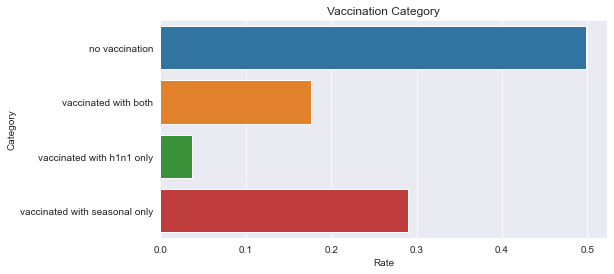

In [17]:
a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(y='vaccination_category',x='count',data=vaccination_category, ci=None)
ax.set_title('Vaccination Category')
ax.set_ylabel('Category')
ax.set_xlabel('Rate')
plt.show()

50% of the respondents has no vaccination, while 15% have both, less than 5% have only h1n1 vaccine, and close to 30% only have vax for seasonal flu.

Plot Sex and Vaccination Category

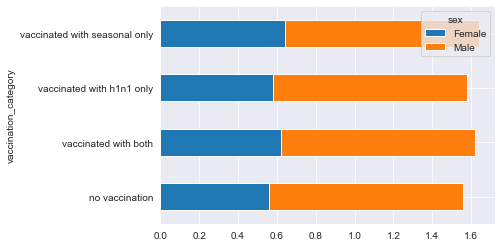

In [78]:
col = 'sex'
grouped= train_df.groupby(['vaccination_category', col])['respondent_id'].count()
stacked = grouped.unstack(level=1)
for i in train_df[col].unique():
    stacked[i] = stacked[i] / stacked.sum(axis=1)

stacked.plot(kind='barh', stacked=True)
plt.show()

In [79]:
col = 'marital_status'
grouped= train_df.groupby(['vaccination_category', col])['respondent_id'].count()
stacked = grouped.unstack(level=1)
for i in train_df[col].unique():
    stacked[i] = stacked[i] / stacked.sum(axis=1)

stacked.plot(kind='barh', stacked=True)
plt.show()

KeyError: nan

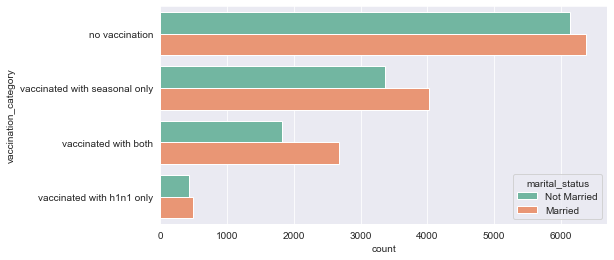

In [19]:
a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(y='vaccination_category', x='count',data=train_df, hue='marital_status', ci=None, estimator=sum, palette='Set2')
plt.show()

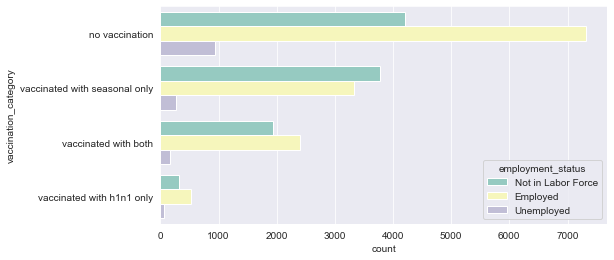

In [20]:
a4_dims = (8, 4)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(y='vaccination_category', x='count',data=train_df, hue='employment_status', ci=None, estimator=sum, palette='Set3')
plt.show()